In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal, fftpack

In [3]:
# create random noise
sig_in =np.round(2**13*np.random.randn(131072))

# define signal rate
Fs = 1.28125e9
F_width = 500e6;

In [4]:
sig_in[0:15]*2**17

array([-1.18974054e+09, -2.54541824e+08, -1.92675840e+09, -1.38726605e+09,
       -1.11948595e+09,  2.97664512e+08,  3.12344576e+08,  6.78821888e+08,
       -7.64805120e+08, -1.88743680e+07, -1.57286400e+09,  4.71859200e+06,
        3.79322368e+08,  3.89283840e+07,  3.68050176e+08])

In [5]:
# create a filter to shape the noise
coeffs = signal.firwin(350,F_width/Fs)

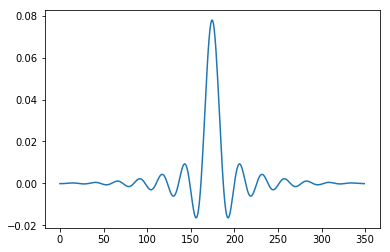

In [6]:
plt.plot(coeffs)

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


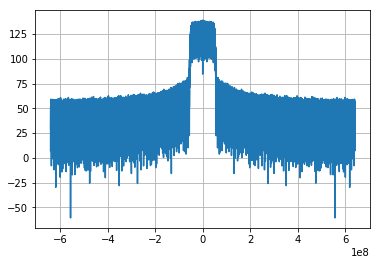

In [7]:
# filter
sig_out = signal.convolve(sig_in, coeffs)

# create axis
freq_axis = np.linspace(-Fs/2, Fs/2, sig_out.size)
plt.plot(freq_axis, 20*np.log10(fftpack.fftshift(fftpack.fft(sig_out))))
plt.grid(True)

In [8]:
file_out = open('data.txt', 'w')
sig_out = (np.round(sig_out))
for item in sig_out:
    num = int(item)
    if (num < 0):
        num = num + 2**16;
    file_out.write('0x' + format(num, '04x') + '0000\n')
    

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


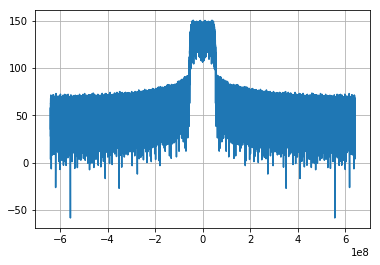

In [9]:
# create random noise but scale to +/- 32767
sig_in =np.round(2**13*np.random.randn(131072))

# define signal rate
Fs = 1.28125e9
F_width = 100e6;
for x, item in enumerate(sig_in):
    if (item > 0):
        sig_in[x] = 32767
    else:
        sig_in[x] = -32767
# filter
sig_out = signal.convolve(sig_in, coeffs)

# create axis
freq_axis = np.linspace(-Fs/2, Fs/2, sig_out.size)
plt.plot(freq_axis, 20*np.log10(fftpack.fftshift(fftpack.fft(sig_out))))
plt.grid(True)

In [43]:
# now we want to create a tone that repeats every 131072 samples..so multiples 
N_samples = 131072;
fundamental_freq = Fs/(N_samples-1)*10000
t = np.arange(131072)

In [44]:
sig_out = (2**15-1)*(np.cos(2*np.pi*fundamental_freq/Fs*t) + 1j*np.sin(2*np.pi*fundamental_freq/Fs*t))

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


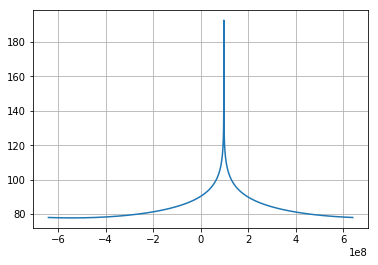

In [45]:
# create axis
freq_axis = np.linspace(-Fs/2, Fs/2, sig_out.size)
plt.plot(freq_axis, 20*np.log10(fftpack.fftshift(fftpack.fft(sig_out))))
plt.grid(True)

In [46]:
fundamental_freq/10000

9775.236322298602

In [47]:
Fs/(N_samples-1)

9775.236322298602